Частина перша: Знайомство з Pandas.

Прочитайте дані за допомогою методу read_html з таблиці "Коефіцієнт народжуваності в регіонах України (1950—2019)" посилання

Необхідно виконати:

1. Вивести перші рядки таблиці за допомогою методу head
2. Визначте кількість рядків та стовпців у датафреймі (атрибут shape)
3. Замініть у таблиці значення "—" на значення NaN
4. Визначте типи всіх стовпців за допомогою dataframe.dtypes
5. Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"
6. Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
7. Видаліть з таблиці дані по всій країні, останній рядок таблиці
8. Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)
9. Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
10. У якому регіоні була найвища народжуваність у 2014 році?
11. Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році


             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126    —    —
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82    —
Shape of the dataframe: (28, 9)
Data types of columns:
Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object
Percentage of missing values in each column: 15.079365079365079
Regions with birth rate higher than the national average in 2019:
[2, 6, 8, 12, 14, 16, 20, 23, 25]
Region with the highest birth rate in 2014: 16


Matplotlib is building the font cache; this may take a moment.


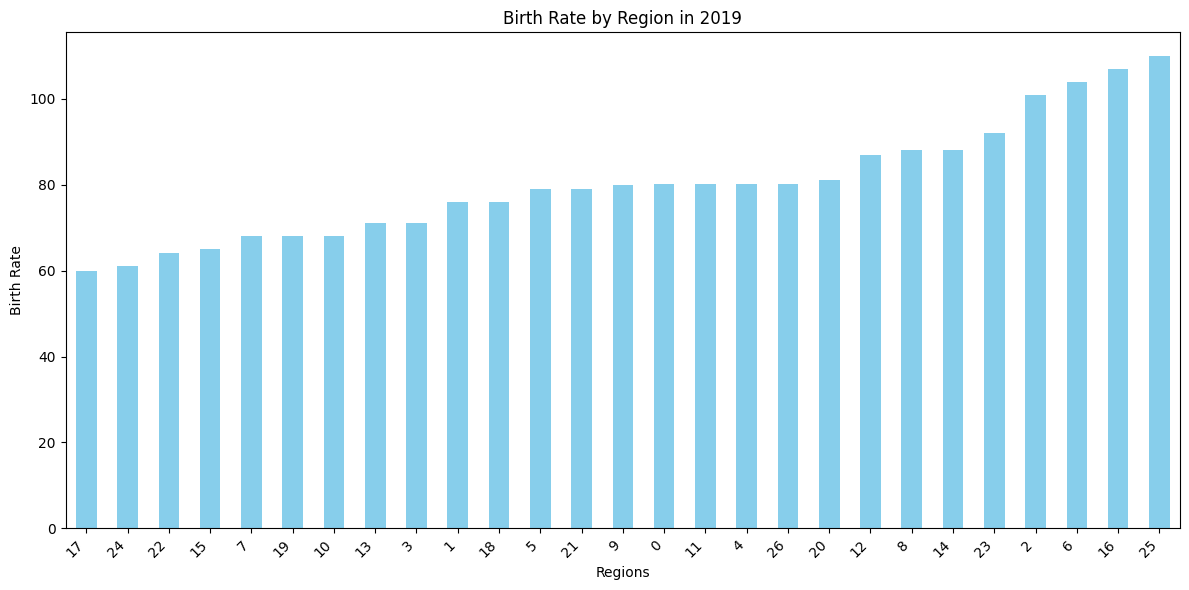

In [8]:
import pandas as pd

url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
tables = pd.read_html(url, header=0)  # header=0 для того, щоб врахувати перший рядок як заголовок

df = tables[12]  # Вибираємо правильну таблицю зі списку зчитаних таблиц
print(df.head())

print('Shape of the dataframe:', df.shape) # Визначення кількості рядків

df = df.replace('—', pd.NA) # Заміна '-' на NaN

print('Data types of columns:')
print(df.dtypes)

df = df.apply(pd.to_numeric, errors='coerce') # Заміна типів колонок, де є NaN

# Обчислення частки пропусків в кожному стовпці
missing_percentages = df.isnull().mean(None) * 100
print('Percentage of missing values in each column:', missing_percentages)

df = df.drop(df.tail(1).index) # Видалення останнього рядка

df = df.fillna(df.mean()) # Заміна відсутніх даних в стовпцях середніми значеннями

# Список регіонів, де народжуваність у 2019 році була вищою за середню по Україні
regions_higher_than_avg_2019 = df[df['2019'] > df['2019'].mean()].index.tolist()
print('Regions with birth rate higher than the national average in 2019:')
print(regions_higher_than_avg_2019)

# Регіон з найвищою народжуваністю у 2014 році
region_highest_birthrate_2014 = df['2014'].idxmax()
print('Region with the highest birth rate in 2014:', region_highest_birthrate_2014)


import matplotlib.pyplot as plt

# Виберемо лише регіони та їх народжуваність у 2019 році
data_2019 = df['2019'].dropna()

plt.figure(figsize=(12, 6))
data_2019.sort_values().plot(kind='bar', color='skyblue')
plt.title('Birth Rate by Region in 2019')
plt.xlabel('Regions')
plt.ylabel('Birth Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
